In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import math
test = pd.read_csv('train.csv')
test.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


## Plot Data

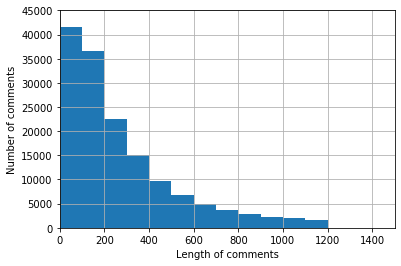

In [2]:
comments_length = test["comment_text"].apply(len)
intervals = [1,100,200,300,400,500,600,700,800,900,1000,1100,1200]
comments_length.plot.hist(bins=intervals)
plt.axis([0, 1500, 0, 45000])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments') 
plt.grid(True)


C:\Users\DHANUJA\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DHANUJA\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


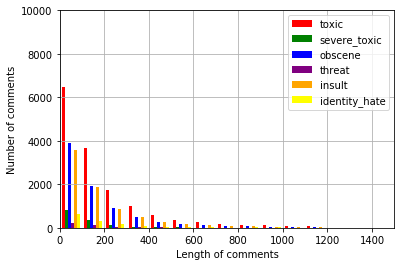

In [3]:
comments_length = test["comment_text"].apply(len)
label = test[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
label = label.as_matrix()
comments_length= comments_length.as_matrix()
#print(label)
#print(comments_length.transpose())
for i in range(len(test.index)):
    label[i][0]*=comments_length[i]
    label[i][1]*=comments_length[i]
    label[i][2]*=comments_length[i]
    label[i][3]*=comments_length[i]
    label[i][4]*=comments_length[i]
    label[i][5]*=comments_length[i]
#label = np.multiply(comments_length,label)
print(label)

types = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
color = ['red','green','blue','purple','orange','yellow']  
plt.hist(label,bins = intervals,label = types,color = color)
plt.axis([0, 1500, 0, 10000])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments') 
plt.legend()
plt.grid(True)
plt.show()     



## Total Samples

In [4]:
print(" # Data " + str(len(test.index)))

 # Data 159571


## Preprocessing

In [5]:
test["comment_text"] = test['comment_text'].str.replace('[^\w\s]','')
test["comment_text"] = test['comment_text'].str.replace('[\n]',' ')
test["comment_text"] = test['comment_text'].str.lower()
test["comment_text"] = test['comment_text'].str.strip()




import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DHANUJA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))
test = test[test['comment_text'].str.len().lt(30)]
test['comment_text'] = test['comment_text'].str.split().apply(lambda x: [item for item in x if item not in stop_words])
test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
89,0037fe4f8f5cdcfb,"[thanks, reading]",0,0,0,0,0,0
173,006a4e493b506d1e,"[oh, didnt, know, thanks]",0,0,0,0,0,0
175,006b888560bcdfcd,"[know, sex, foetus]",0,0,0,0,0,0
241,009a3333aa4ac011,"[listas, sabina, bavaria]",0,0,0,0,0,0
254,00a3073791a5feaa,"[pls, give, reply, yes]",0,0,0,0,0,0


In [7]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
lemmatiser = WordNetLemmatizer()
stemmer = PorterStemmer()
#download words from wordnet library
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DHANUJA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
test['comment_text']=test['comment_text'].apply(lambda x:[stemmer.stem(lemmatiser.lemmatize(word,pos="v")) for word in x])
test['comment_text']=test['comment_text'].apply(lambda x: " ".join(x))
test.shape

(7370, 8)

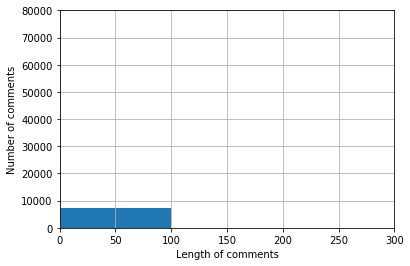

In [9]:
comments_length = test["comment_text"].apply(len)
intervals = [1,100,200,300,400,500,600,700,800,900,1000,1100,1200]
comments_length.plot.hist(bins=intervals)
plt.axis([0, 300, 0, 80000])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments') 
plt.grid(True)
temp=test['comment_text']

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
test['comment_text']=temp.str.replace('[0-9]','').str.replace('[^(a-z)\s]','')
x_train_docs = test['comment_text']
x_train_docs = list(x_train_docs)

In [13]:
y_train = np.array(test[["toxic","severe_toxic","obscene","threat","insult","identity_hate"]])
vec = CountVectorizer()
X = vec.fit_transform(x_train_docs)
df = pd.DataFrame(X.toarray() , columns=vec.get_feature_names())
df

,aana,aardvark,abc,abd,abecedar,abeg,abi,abil,abl,aborigin,...,zeredi,zero,zico,zilina,zomg,zootalk,zorntalk,zspun,zzuuzz,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
